In [2]:
import qsharp
from numpy import arccos,radians,degrees,pi
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_vector, plot_state_qsphere

# Entanglement implmentation
# Q Sharp for DumpMachine Visualization

In [3]:
%%qsharp

open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Convert;

operation SetQubitState (required_state : Result, current_qubit : Qubit) : Unit {
    if required_state != M(current_qubit){
        X(current_qubit);
    }
}
    
operation Entanglement() : (Result, Result){
    
    use q1 = Qubit();
    use q2 = Qubit();
    
    SetQubitState(One, q1);
    SetQubitState(Zero, q2);
    
    within{
        H(q1);
        CNOT(q1,q2);
    }apply {
        DumpMachine();
    }
    
    return (M(q1), M(q2));
}

In [4]:
Entanglement.simulate()
with qsharp.capture_diagnostics() as diagnostics:
    Entanglement.simulate()

|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	-0.7071067811865476 + 0𝑖

In [5]:
# Quantum Circuit Visualization through Q-Sphere

quantum_Circuit = QuantumCircuit(2)
quantum_Circuit.h(0)
quantum_Circuit.cx(0,1)
quantum_Circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [6]:
simulator = Aer.get_backend('aer_simulator')
quantum_Circuit.save_statevector()
quantum_Object = assemble(quantum_Circuit)
result = simulator.run(quantum_Object).result()
final_state = result.get_statevector()

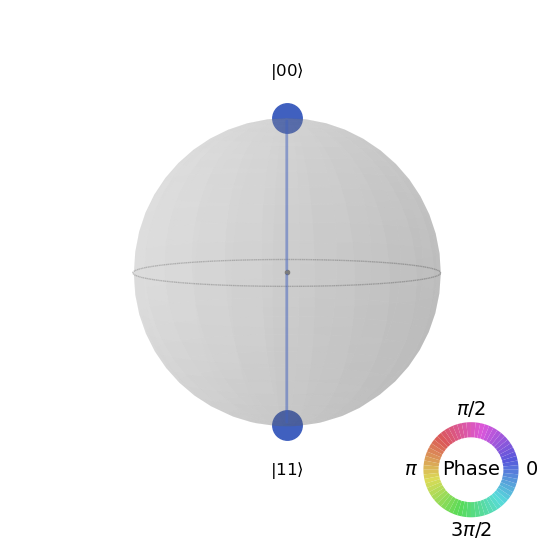

In [8]:
plot_state_qsphere(final_state)